In [3]:
import numpy as np
# rawdatapath="Cubesat v3 antenna20230521174820";
# rawdatapath="F5288 2x2 Through20230521114713"

# rawdatapath="F5288 2x2 Through20230521080710"
# rawdatapath="F5288 2x2 Through20230510164023_phi90_RHCP"
# rawdatapath="F5288 2x2 Through20230521080710"#RHCP
# rawdatapath="F5288 2x2 Through20230601204253"
rawdatapath="D:/USER/Downloads/f6212/Measurement/F6212_OTA/F6212_2x2_BVH20230606115303"
# rawdatapath="F5288 2x2 Through20230521134930"#beamforming to 30 
# rawdatapath="F5288 2x2 Through20230521105812"#phi0 RHCP

Text(0.5, 1.0, 'Heatmap of S12(dB)')

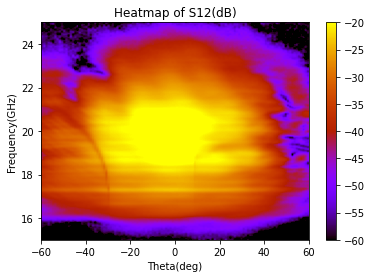

In [4]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
dir = os.getcwd()
# Get a list of CSV file paths
dfs = pd.DataFrame()
deg_res=1


for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"
#     file_path = f"{rawdatapath}/Phi0_theta_{theta}.csv"
    df = pd.read_csv(file_path)
    dfs = pd.concat([dfs, df['S12_LogM']], axis=1)
   
dfs_np_rhcp = dfs.to_numpy()

# print(dfs.shape)
# dfT
# dfs
plt.imshow(np.flip(dfs_np_rhcp, axis = 0), cmap='gnuplot', aspect='auto',vmin=-60,vmax = -20, extent=[-60, 60, 15, 25])
colorbar= plt.colorbar()
# colorbar.set_lim(-60, -20)


# Add labels and title
plt.xlabel('Theta(deg)')
plt.ylabel('Frequency(GHz)')
plt.title('Heatmap of S12(dB)')

# plt.show()
# # df['S21_LogM']-df['S31_LogM']
# fig = plt2.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Apply a colormap to the plot
# colormap = plt2.cm.jet  # Choose the desired colormap
# surf = ax.plot_surface(X, Y, dfs_np_rhcp, cmap=colormap)

(1001, 121)


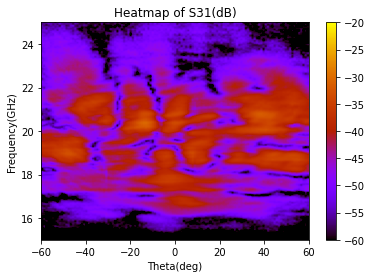

In [5]:
dir = os.getcwd()
# Get a list of CSV file paths
dfs = pd.DataFrame()
deg_res=1


for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"
#     file_path = f"{rawdatapath}/Phi0_theta_{theta}.csv"
    df = pd.read_csv(file_path)
    dfs = pd.concat([dfs, df['S13_LogM']], axis=1)
   
dfs_np_lhcp = dfs.to_numpy()

print(dfs.shape)
# dfT
# dfs
plt.imshow(np.flip(dfs_np_lhcp, axis = 0), cmap='gnuplot', aspect='auto',vmin=-60,vmax = -20, extent=[-60, 60, 15, 25])
colorbar= plt.colorbar()
# colorbar.set_lim(-60, -20)


# Add labels and title
plt.xlabel('Theta(deg)')
plt.ylabel('Frequency(GHz)')
plt.title('Heatmap of S31(dB)')

plt.show()

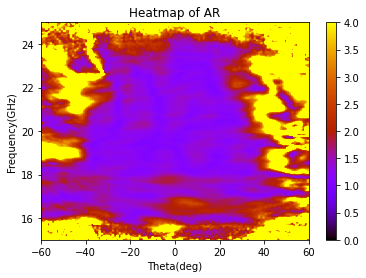

In [6]:
AR_dis = (abs(10**(dfs_np_lhcp/20)) + abs(10**(dfs_np_rhcp/20))) / (abs(10**(dfs_np_rhcp/20)) - abs(10**(dfs_np_lhcp/20)))


plt.imshow(np.flip(abs(AR_dis), axis = 0), cmap='gnuplot', aspect='auto',vmin=0,vmax = 4, extent=[-60, 60, 15, 25])
colorbar= plt.colorbar()
# colorbar.set_lim(-60, -20)


# Add labels and title
plt.xlabel('Theta(deg)')
plt.ylabel('Frequency(GHz)')
plt.title('Heatmap of AR')
# plt.xlabel('(Theta+60)/2 (deg)')
# plt.ylabel('(Frequency-24G)*1e-7')
# plt.title('Colormap Plot')

plt.show()
# df['S21_LogM']-df['S31_LogM']


In [7]:
df = pd.read_csv(file_path)
#         dfr_90 = dfr_90.append(df['S21_LogM'])
dfr_90 = pd.concat([dfr_90, df['S12_LogM']], axis=1)
dfr_90

NameError: name 'dfr_90' is not defined

In [6]:

fre_shift = 300
deg_res=1
theta_series = []
dfr_0 = pd.DataFrame()
dfl_0 = pd.DataFrame()
dfr_90 = pd.DataFrame()
dfl_90 = pd.DataFrame()
for i in range(-60,61,deg_res):
    theta_series.append(i)

for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"
#         file_path = f"{rawdatapath}/Phi00_theta_{theta}.csv"
    df = pd.read_csv(file_path)
#         dfr_90 = dfr_90.append(df['S21_LogM'])
    dfr_90 = pd.concat([dfr_90, df['S12_LogM']], axis=1)
for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"
#         file_path = f"{rawdatapath}/Phi00_theta_{theta}.csv"
    df = pd.read_csv(file_path)
    dfl_90 = pd.concat([dfr_90, df['S13_LogM']], axis=1)

# # Plot line 1
#     plt.imshow(np.flip(dfs_np_lhcp, axis = 0), cmap='gnuplot', aspect='auto',vmin=-55,vmax = -25, extent=[-60, 60, 24, 32])
plt.plot(theta_series,dfr_90[fre_shift], label='S21 @'+str(fre)+'GHz')

# # Plot line 2
plt.plot(theta_series,dfl_90[fre_shift], label='S31 @'+str(fre)+'GHz')
plt.grid()
plt.ylim([-80, -20])
plt.xlim([-60, 60])
plt.title('S21 vs S31 after calibration')
#     plt.title('S21 vs S31 @ '+str(fre)+'GHz')
plt.xlabel('Theta(deg)')
plt.ylabel('Gain(dB)')
plt.legend(loc='upper left')
plt.legend(fontsize=7)
#     plt.rc('font', size=SMALL_SIZE) 

KeyError: 300

In [10]:
def phi_check(fre):
    rawdatapath1="F5288 2x2 Through20230530170355"
    rawdatapath2="F5288 2x2 Through20230530170355"#phi0 RHCP
    # for fre in range(28):
#     fre = 28
    fre_shift = (fre-24)/0.01
    deg_res=2
    theta_series = []
    dfr_0 = pd.DataFrame()
    dfl_0 = pd.DataFrame()
    dfr_90 = pd.DataFrame()
    dfl_90 = pd.DataFrame()
    for i in range(-60,61,deg_res):
        theta_series.append(i)
    #phi90
    for theta in range(-60,61,deg_res):
        file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
    #     file_path = f"{rawdatapath2}/Phi0_theta_{theta}.csv"

        df = pd.read_csv(file_path)
        dfr_90 = dfr_90.append(df['S21_LogM'])

    for theta in range(-60,61,deg_res):
        file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
    #     file_path = f"{rawdatapath1}/Phi0_theta_{theta}.csv"

        df = pd.read_csv(file_path)
        dfl_90 = dfl_90.append(df['S31_LogM'])

    # # Plot line 1
    plt.plot(theta_series,dfr_90[fre_shift], label='S21@$\\Phi$=90,'+str(fre)+'GHz')

    # # Plot line 2
    plt.plot(theta_series,dfl_90[fre_shift], label='S31@$\\Phi$=90,'+str(fre)+'GHz')
    #phi0
    for theta in range(-60,61,deg_res):
    #     file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
        file_path = f"{rawdatapath2}/Phi0_theta_{theta}.csv"

        df = pd.read_csv(file_path)
        dfr_0 = dfr_0.append(df['S21_LogM'])

    for theta in range(-60,61,deg_res):
    #     file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
        file_path = f"{rawdatapath2}/Phi0_theta_{theta}.csv"

        df = pd.read_csv(file_path)
        dfl_0 = dfl_0.append(df['S31_LogM'])

    # # Plot line 1
    plt.plot(theta_series,dfr_0[fre_shift], label='S21@$\\Phi$=0,'+str(fre)+'GHz')

    # # Plot line 2
    plt.plot(theta_series,dfl_0[fre_shift], label='S31@$\\Phi$=0,'+str(fre)+'GHz')
    plt.grid()
    plt.ylim([-80, -20])
    plt.xlim([-60, 60])
    plt.title('S21, S31 Comparison : '+ '$\\Phi$=0 vs $\\Phi$=90 ')
    #     plt.title('S21 vs S31 @ '+str(fre)+'GHz')
    plt.xlabel('Theta(deg)')
    plt.ylabel('Gain(dB)')
    plt.legend(fontsize=9,loc='lower left')
    # plt.legend()
    #     plt.rc('font', size=SMALL_SIZE) 
    # import matplotlib.pyplot as plt
    # theta_series = []
    # for i in range(-60,61,deg_res):
    #     theta_series.append(i)
    dfs_np_rhcp_0 = dfr_0[fre_shift].to_numpy()
    dfs_np_lhcp_0 = dfl_0[fre_shift].to_numpy()
    dfs_np_rhcp_90 = dfr_90[fre_shift].to_numpy()
    dfs_np_lhcp_90 = dfl_90[fre_shift].to_numpy()

    AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) )) 
    AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) )) 


    plt.figure()
    plt.plot(theta_series,abs(AR_90), label='AR @$\\Phi$=90, '+str(fre)+'GHz')
    plt.plot(theta_series,abs(AR_0), label='AR @$\\Phi$=0, '+str(fre)+'GHz')
    plt.ylim([0, 8])
    plt.xlim([-60, 60])
    plt.xlabel('Theta(deg)')
    plt.ylabel('AR(dB)')
    plt.legend(fontsize=9,loc='upper center')
    plt.grid()

In [11]:
fre=19;fre_shift = (fre-24)/0.01
dfs_np_rhcp_0 = dfr_0[fre_shift].to_numpy()
dfs_np_lhcp_0 = dfl_0[fre_shift].to_numpy()
dfs_np_rhcp_90 = dfr_90[fre_shift].to_numpy()
dfs_np_lhcp_90 = dfl_90[fre_shift].to_numpy()

AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) )) 
AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) )) 


plt.figure()
plt.plot(theta_series,abs(AR_90), label='AR @$\\Phi$=90, '+str(fre)+'GHz')
plt.plot(theta_series,abs(AR_0), label='AR @$\\Phi$=0, '+str(fre)+'GHz')
plt.ylim([0, 8])
plt.xlim([-60, 60])
plt.xlabel('Theta(deg)')
plt.ylabel('AR(dB)')
plt.legend(fontsize=9,loc='upper center')
plt.grid()
    

FileNotFoundError: [Errno 2] No such file or directory: 'F5288 2x2 Through20230530170355/Phi90_theta_-60.csv'

In [112]:
rawdatapath1="F5288 2x2 Through20230530170355"
rawdatapath2="F5288 2x2 Through20230530170355"#phi0 RHCP
# for fre in range(28):
#     fre = 28
fre_shift = (fre-24)/0.01
deg_res=1
theta_series = []
dfr_0 = pd.DataFrame()
dfl_0 = pd.DataFrame()
dfr_90 = pd.DataFrame()
dfl_90 = pd.DataFrame()
for i in range(-60,61,deg_res):
    theta_series.append(i)
#phi90
for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
#     file_path = f"{rawdatapath2}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfr_90 = dfr_90.append(df['S21_LogM'])

for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
#     file_path = f"{rawdatapath1}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfl_90 = dfl_90.append(df['S31_LogM'])

# # Plot line 1
plt.plot(theta_series,dfr_90[fre_shift], label='S21@$\\Phi$=90,'+str(fre)+'GHz')

# # Plot line 2
plt.plot(theta_series,dfl_90[fre_shift], label='S31@$\\Phi$=90,'+str(fre)+'GHz')
#phi0
for theta in range(-60,61,deg_res):
#     file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
    file_path = f"{rawdatapath2}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfr_0 = dfr_0.append(df['S21_LogM'])

for theta in range(-60,61,deg_res):
#     file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
    file_path = f"{rawdatapath2}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfl_0 = dfl_0.append(df['S31_LogM'])

# # Plot line 1
plt.plot(theta_series,dfr_0[fre_shift], label='S21@$\\Phi$=0,'+str(fre)+'GHz')

# # Plot line 2
plt.plot(theta_series,dfl_0[fre_shift], label='S31@$\\Phi$=0,'+str(fre)+'GHz')
plt.grid()
plt.ylim([-80, -20])
plt.xlim([-60, 60])
plt.title('S21, S31 Comparison : '+ '$\\Phi$=0 vs $\\Phi$=90 ')
#     plt.title('S21 vs S31 @ '+str(fre)+'GHz')
plt.xlabel('Theta(deg)')
plt.ylabel('Gain(dB)')
plt.legend(fontsize=9,loc='lower left')
# plt.legend()
#     plt.rc('font', size=SMALL_SIZE) 
# import matplotlib.pyplot as plt
# theta_series = []
# for i in range(-60,61,deg_res):
#     theta_series.append(i)
dfs_np_rhcp_0 = dfr_0[fre_shift].to_numpy()
dfs_np_lhcp_0 = dfl_0[fre_shift].to_numpy()
dfs_np_rhcp_90 = dfr_90[fre_shift].to_numpy()
dfs_np_lhcp_90 = dfl_90[fre_shift].to_numpy()

AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) )) 
AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) )) 


plt.figure()
plt.plot(theta_series,abs(AR_90), label='AR @$\\Phi$=90, '+str(fre)+'GHz')
plt.plot(theta_series,abs(AR_0), label='AR @$\\Phi$=0, '+str(fre)+'GHz')
plt.ylim([0, 8])
plt.xlim([-60, 60])
plt.xlabel('Theta(deg)')
plt.ylabel('AR(dB)')
plt.legend(fontsize=9,loc='upper center')
plt.grid()

KeyError: -2399.99

In [148]:
dfl_0

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
S31_LogM,-50.07095,-50.009323,-50.499084,-50.456261,-50.53952,-50.575207,-50.274303,-49.492584,-48.628532,-48.149818,...,-47.178398,-46.670151,-46.547363,-46.163074,-46.459583,-46.749886,-46.835938,-46.938824,-47.214317,-47.620361


In [181]:
Phi=0
theta = 0
rawdatapath1="F5288 2x2 Through20230530170355"
freq_series = pd.DataFrame()
dfr_90 = pd.DataFrame()
dfl_90 = pd.DataFrame()
dfr_0 = pd.DataFrame()
dfl_0 = pd.DataFrame()
AR_0 = pd.DataFrame()
AR_90 = pd.DataFrame()
file_path = f"{rawdatapath1}/Phi90_theta_0.csv"
df = pd.read_csv(file_path)
freq_series = freq_series.append(df['Frequency'])
dfr_90 = dfr_90.append(df['S21_LogM'])
dfl_90 = dfl_90.append(df['S31_LogM'])


file_path = f"{rawdatapath1}/Phi0_theta_0.csv"
df = pd.read_csv(file_path)
# freq_series = freq_series.append(df['Frequency'])
dfr_0=dfr_0.append(df['S21_LogM'])
dfl_0=dfl_0.append(df['S31_LogM'])

# fre=30
# fre_shift = (fre-24)/0.01
dfs_np_rhcp_0 = dfr_0.to_numpy()
dfs_np_lhcp_0 = dfl_0.to_numpy()
dfs_np_rhcp_90 = dfr_90.to_numpy()
dfs_np_lhcp_90 = dfl_90.to_numpy()
AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) ))
AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) ))

# plt.figure()
# # plt.plot(freq_series,abs(AR_90), label='AR @$\\Phi$=90, @$\\Theta$=0')
# plt.plot(freq_series,abs(AR_0), label='AR @$\\Phi$=0, @$\\Theta$=0' )
# plt.ylim([0, 8])
# plt.xlim([24, 32])
# plt.xlabel('Frequency(GHz)')
# plt.ylabel('AR(dB)')
# plt.legend(fontsize=9,loc='upper center')
# plt.grid()
# # freq_series.shape
# AR_0

In [183]:
np.savetxt('data2.csv', AR_90, delimiter=',')

In [131]:
start = 24
end = 5
step = 0.1

# Convert the step to an appropriate integer representation
step_int = int(step * 10)

# Generate a list of values using a list comprehension
values = [start + i / 10 for i in range(int((end - start) * 10), 0, -step_int)]

# Print the values
for value in values:
    print(value)

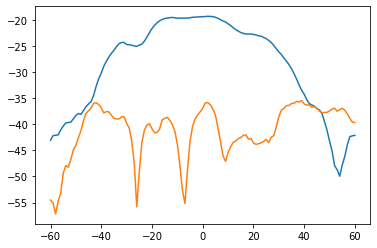

In [13]:
# rawdatapath1="F5288 2x2 Through20230530170355"
# rawdatapath2="F5288 2x2 Through20230521105812"#phi0 RHCP
rawdatapath1="D:/USER/Downloads/f6212/Measurement/F6212_OTA/F6212_2x2_BVH20230606115303"
# for fre in range(28):
fre = 21
fre_shift = (fre-15)/0.01
deg_res=1
theta_series = []
dfr_0 = pd.DataFrame()
dfl_0 = pd.DataFrame()
dfr_90 = pd.DataFrame()
dfl_90 = pd.DataFrame()
for i in range(-60,61,deg_res):
    theta_series.append(i)
#phi90
for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
#         file_path = f"{rawdatapath2}/Phi00_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfr_90 = dfr_90.append(df['S12_LogM'])

for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
#         file_path = f"{rawdatapat2}/Phi00_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfl_90 = dfl_90.append(df['S13_LogM'])

# # Plot line 1
plt.plot(theta_series,dfr_90[fre_shift], label='S21@$\\Phi$=90,'+str(fre)+'GHz')

# # Plot line 2
plt.plot(theta_series,dfl_90[fre_shift], label='S31@$\\Phi$=90,'+str(fre)+'GHz')
#phi0
deg_res=1
for theta in range(-60,61,deg_res):
#         file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
    file_path = f"{rawdatapath2}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfr_0 = dfr_0.append(df['S21_LogM'])

for theta in range(-60,61,deg_res):
#         file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
    file_path = f"{rawdatapath2}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfl_0 = dfl_0.append(df['S31_LogM'])

# # # Plot line 1
plt.plot(theta_series,dfr_0[fre_shift], label='S12@$\\Phi$=0,'+str(fre)+'GHz')

# # # Plot line 2
plt.plot(theta_series,dfl_0[fre_shift], label='S13@$\\Phi$=0,'+str(fre)+'GHz')
plt.grid()
plt.ylim([-80, -20])
plt.xlim([-60, 60])
plt.title('S12, S13 Comparison : '+ '$\\Phi$=0 vs $\\Phi$=90 ')
#     plt.title('S21 vs S31 @ '+str(fre)+'GHz')
plt.xlabel('Theta(deg)')
plt.ylabel('Gain(dB)')
plt.legend(fontsize=9,loc='lower left')
# plt.legend()
#     plt.rc('font', size=SMALL_SIZE) 
import matplotlib.pyplot as plt
# theta_series = []
# for i in range(-60,61,deg_res):
#     theta_series.append(i)
dfs_np_rhcp_0 = dfr_0[fre_shift].to_numpy()
dfs_np_lhcp_0 = dfl_0[fre_shift].to_numpy()
dfs_np_rhcp_90 = dfr_90[fre_shift].to_numpy()
dfs_np_lhcp_90 = dfl_90[fre_shift].to_numpy()

AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) )) 
AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) )) 


plt.figure()
plt.plot(theta_series,abs(AR_90), label='AR @$\\Phi$=90, '+str(fre)+'GHz')
plt.plot(theta_series,abs(AR_0), label='AR @$\\Phi$=0, '+str(fre)+'GHz')
plt.ylim([0, 8])
plt.xlim([-60, 60])
plt.xlabel('Theta(deg)')
plt.ylabel('AR')
plt.legend(fontsize=9,loc='upper center')
plt.grid()
# Plot line 1
plt.figure()

(-60.0, 60.0)

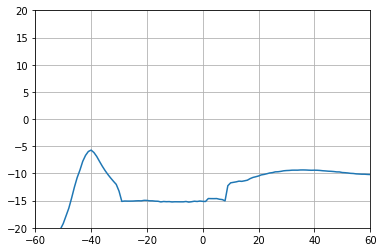

In [12]:
rawdatapath1="D:/USER/Downloads/f6212/Measurement/F6212_OTA/F6212_2x2_BVH20230606115303"
# for fre in range(28):
fre = 20
fre_shift = (fre-15)/0.01
deg_res=1
theta_series = []
dfr_0 = pd.DataFrame()
dfl_0 = pd.DataFrame()
dfr_90 = pd.DataFrame()
dfl_90 = pd.DataFrame()
for i in range(-60,61,deg_res):
    theta_series.append(i)
#phi90
for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
#         file_path = f"{rawdatapath2}/Phi00_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfr_90 = dfr_90.append(df['S11_LogM'])

# for theta in range(-60,61,deg_res):
#     file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
# #         file_path = f"{rawdatapat2}/Phi00_theta_{theta}.csv"

#     df = pd.read_csv(file_path)
#     dfl_90 = dfl_90.append(df['S13_LogM'])

# # Plot line 1
plt.plot(theta_series,dfr_90[fre_shift], label='S11@$\\Phi$=90,'+str(fre)+'GHz')

# # # Plot line 2
# plt.plot(theta_series,dfl_90[fre_shift], label='S31@$\\Phi$=90,'+str(fre)+'GHz')
plt.grid()
plt.ylim([-20, 20])
plt.xlim([-60, 60])

In [ ]:

fre = 30
fre_shift = (fre-24)/0.01
deg_res=2
theta_series = []
dfr_0 = pd.DataFrame()
dfl_0 = pd.DataFrame()
dfr_90 = pd.DataFrame()
dfl_90 = pd.DataFrame()
for i in range(-60,61,deg_res):
    theta_series.append(i)

for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfr_90 = dfr_90.append(df['S21_LogM'])

for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfl_90 = dfl_90.append(df['S31_LogM'])

# # Plot line 1
plt.plot(theta_series,dfr_90[fre_shift], label='Line 1')

# # Plot line 2
plt.plot(theta_series,dfl_90[fre_shift], label='Line 2')
plt.grid()
plt.ylim([-80, -20])
plt.xlim([-60, 60])
plt.title('S21 vs S31 @ '+str(fre)+'GHz')
plt.xlabel('Theta(deg)')
plt.ylabel('Gain(dB)')

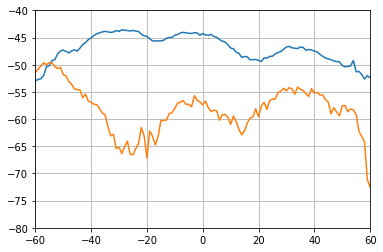

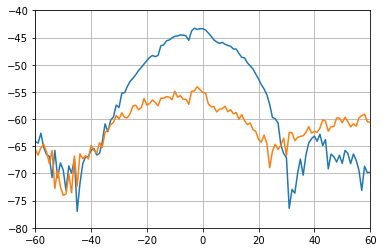

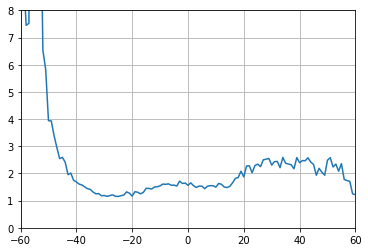

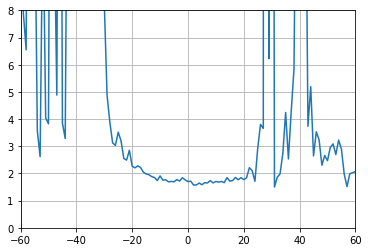

In [4]:
#cubesat antenna
rawdatapath ="Cubesat v3 antenna20230522173410_TX_1_CH_1_2"
fre = 17.5
fre_shift = (fre-15)/0.01
deg_res=2
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
dir = os.getcwd()
# Get a list of CSV file paths
dfr_0 = pd.DataFrame()
dfl_0 = pd.DataFrame()
dfr_90 = pd.DataFrame()
dfl_90 = pd.DataFrame()


# dff = pd.DataFrame({'theta': [ for i in range(-60,61,1)]})
theta_series = []
for i in range(-60,61,1):
    theta_series.append(i)

for theta in range(-60,61,1):
    file_path = f"{rawdatapath}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfr_0 = dfr_0.append(df['S21_LogM'])

for theta in range(-60,61,1):
    file_path = f"{rawdatapath}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfl_0 = dfl_0.append(df['S31_LogM'])

for theta in range(-60,61,1):
    file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfr_90 = dfr_90.append(df['S21_LogM'])

for theta in range(-60,61,1):
    file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfl_90 = dfl_90.append(df['S31_LogM'])
    
plt.figure()

# # Plot line 1
plt.plot(theta_series,dfr_0[fre_shift], label='Line 1')

# # Plot line 2
plt.plot(theta_series,dfl_0[fre_shift], label='Line 2')
plt.grid()
plt.ylim([-80, -40])
plt.xlim([-60, 60])
plt.figure()
# # Plot line 1
plt.plot(theta_series,dfr_90[fre_shift], label='Line 1')

# # Plot line 2
plt.plot(theta_series,dfl_90[fre_shift], label='Line 2')
plt.grid()
plt.ylim([-80, -40])
plt.xlim([-60, 60])



 
dfs_np_rhcp_0 = dfr_0[fre_shift].to_numpy()
dfs_np_lhcp_0 = dfl_0[fre_shift].to_numpy()
dfs_np_rhcp_90 = dfr_90[fre_shift].to_numpy()
dfs_np_lhcp_90 = dfl_90[fre_shift].to_numpy()



AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) )) 
AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) )) 

# # Plot line 1
plt.figure()
plt.plot(theta_series,abs(AR_0), label='Line 1')
plt.ylim([0, 8])
plt.xlim([-60, 60])
plt.grid()
# # Plot line 1
plt.figure()
plt.plot(theta_series,abs(AR_90), label='Line 1')
plt.ylim([0, 8])
plt.xlim([-60, 60])
plt.grid()